In [1]:
# 匯入"網路插座"模組套件，提供 2 台電腦連線,附帶警告處理的相關函式
import socket,warnings

# 設定連接超時時間為 1 秒 
try:
    socket.setdefaulttimeout(1)
    
    # 基本設定(family, type, proto)
    # 伺服器與伺服器之間進行 Internet 通訊 
    # 宣告資料流連線方式: TCP (提供可靠、雙向、串流的通信頻道)          # 主機IP, PORT                                                            
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53)) 
    
# 發生Exception例外錯誤時，拋出並附帶錯誤訊息
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")
    

In [2]:
# 匯入操作檔案套件
import os

# 檢查是否在 Kaggle 環境中運行
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

# 如果是在 Kaggle 環境中，安裝最新版本
if iskaggle:
    !pip install -Uqq fastai duckduckgo_search
    !pip install fastai
    !pip install fastbook
    !pip install --upgrade pip

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.0.5 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.1 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.1 requires jupyterlab<5.0.0a0,>=4.0.6, but you have jupyterlab 4.0.5 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 3.5 MB/s eta 0:00:00
  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/8a/6a/19e9fe04fca059ccf770861c7d5721ab4c2aebc539889e97c7977528a53b/pip-24.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1


In [3]:
# 導入 DuckDuckGo 搜索 'DDGS'
from duckduckgo_search import DDGS
# 導入 fastcore 模塊的所有功能
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

# 導入 itertools 模塊的 islice 函數，用於截取迭代器中的前幾個元素
#from itertools import islice

# 創建 DuckDuckGo 搜索器實例
#ddgs = DDGS()

In [4]:
# 從 fastbook 庫中匯入必要的函數，用於快速構建和訓練機器學習模型
from fastbook import *

# 匯入 fastai.vision.widgets 庫，用於創建圖像相關的界面組件
from fastai.vision.widgets import *

# 定義函數搜索並返回圖片列表，圖片數量30
def search_images(term, max_images=30):
  """
  根據指定的搜索詞在網路上搜索圖像，並返回搜索結果列表。

  Args:
    term (str): 要搜索的關鍵詞或短語。
    max_images (int, optional): 返回的最大圖像數量。默認為30。

  Returns:
    L: 包含搜索結果圖像的列表。
  """

  # 輸出搜尋結果
  print(f"正在搜索 '{term}' 相關圖像")

  # 使用 DuckDuckGo 搜索引擎進行搜索
  # 調用搜索函數獲取圖像列表
  return L(search_images_ddg(term, max_images=max_images))

In [5]:
# 雖然作者有提醒了，但是這邊我真的卡很久... 
# NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
# If you get a JSON error, just try running it again (it may take a couple of tries).

# 使用 `search_images` 函數搜索包含鳥類照片的圖片URL，最多返回1張圖片
urls = search_images('bird photos', max_images=1)

# 輸出圖片第零張 URL 
urls[0]

正在搜索 'bird photos' 相關圖像


'http://s1.picswalls.com/wallpapers/2014/07/18/birds-high-definition_104547222_54.jpg'

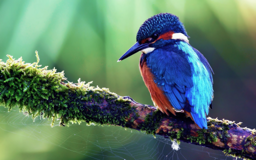

In [6]:
# 導入 fastdownload 模塊，提供下載檔案的功能
from fastdownload import download_url 

# 下載搜索到第零張圖片到本地文件 bird.jpg
dest = 'bird.jpg' 

# 使用 fastdownload 模塊下載圖片， False 不顯示下載進度
download_url(urls[0], dest, show_progress=False)

# 導入 fastai.vision 全部模塊，提供圖像處理的功能
from fastai.vision.all import * 

# 使用 Image 類打開下載的圖片
im = Image.open(dest) 

# 圖片大小為 256x256
im.to_thumb(256,256) 

正在搜索 'forest photos' 相關圖像


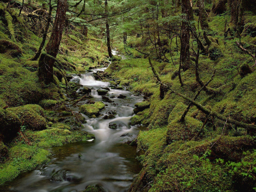

In [7]:
# 使用 search_images 函數搜索包含森林照片的圖片URL，最多返回1張圖片
# 下載搜索到第零張圖片到本地文件 forest.jpg，False 不顯示下載進度
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)

# 生成 'forest.jpg' 圖片大小為 256x256
Image.open('forest.jpg').to_thumb(256,256)

In [8]:
# 搜尋的關鍵字
searches = 'forest','bird'

# 設置存儲圖片的目錄路徑
path = Path('bird_or_not')

# 導入 sleep 函數，用於每次搜尋之間的暫停
from time import sleep

# 遍歷每個搜尋關鍵詞
for o in searches:
    
    # 設置目標目錄，並創建它（如果不存在）
    dest = (path/o)
    
    # 如果子目錄不存在， False 則建立它
    dest.mkdir(exist_ok=True, parents=True)
    
    # fastdownload 套件內建的功能search_images。可以使用 DuckDuckGo 搜索引擎來搜索圖片，並返回搜索結果的 URL 列表)
    # 下載圖片 (儲存位置, 帶入字串搜尋forest photo & bird photo) 
    download_images(dest, urls=search_images(f'{o} photo'))
    # 每次搜尋暫停時間: 10 秒
    sleep(10)  
    
    # 下載圖片 (儲存位置, 帶入字串搜尋forest sun photo & bird sun photo)
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    
    # 下載圖片 (儲存位置, 帶入字串搜尋forest shade photo & bird shade photo)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    
    # 調整下載的圖片大小最大邊長為 400 像素 ( 子目錄/遍歷, 尺寸條件, 儲存到根目錄/遍歷 )
    resize_images(path/o, max_size=400, dest=path/o)
"""    
函數可用參數
search_images(query, max_images=100, safe_search=True,engine="duckduckgo",
            extensions=None,timeout=10, headers=None,
            user_agent=None,proxy=None, cookies=None)
query：搜索查詢字符串。
max_images：要返回的最大圖片數。
safe_search：是否啟用安全搜索。
engine：要使用的搜索引擎。
extensions：要搜索的圖片擴展名列表。
timeout：單個搜索請求的超時時間（秒）。
headers：要傳遞到搜索請求的 HTTP 標頭。
user_agent：要使用的 HTTP 用戶代理。
proxy：要使用的 HTTP 代理。
cookies：要使用的 HTTP cookie。
"""

正在搜索 'forest photo' 相關圖像
正在搜索 'forest sun photo' 相關圖像
正在搜索 'forest shade photo' 相關圖像
正在搜索 'bird photo' 相關圖像
正在搜索 'bird sun photo' 相關圖像
正在搜索 'bird shade photo' 相關圖像


'    \n函數可用參數\nsearch_images(query, max_images=100, safe_search=True,engine="duckduckgo",\n            extensions=None,timeout=10, headers=None,\n            user_agent=None,proxy=None, cookies=None)\nquery：搜索查詢字符串。\nmax_images：要返回的最大圖片數。\nsafe_search：是否啟用安全搜索。\nengine：要使用的搜索引擎。\nextensions：要搜索的圖片擴展名列表。\ntimeout：單個搜索請求的超時時間（秒）。\nheaders：要傳遞到搜索請求的 HTTP 標頭。\nuser_agent：要使用的 HTTP 用戶代理。\nproxy：要使用的 HTTP 代理。\ncookies：要使用的 HTTP cookie。\n'

In [9]:
# verify_images() 函數會檢查每個圖片檔，如果圖片檔無效其添加到 failed 
failed = verify_images(get_image_files(path))

# 將 unlink 無效圖片刪除
failed.map(Path.unlink)

# 輸出無效圖片的數量
len(failed)

5

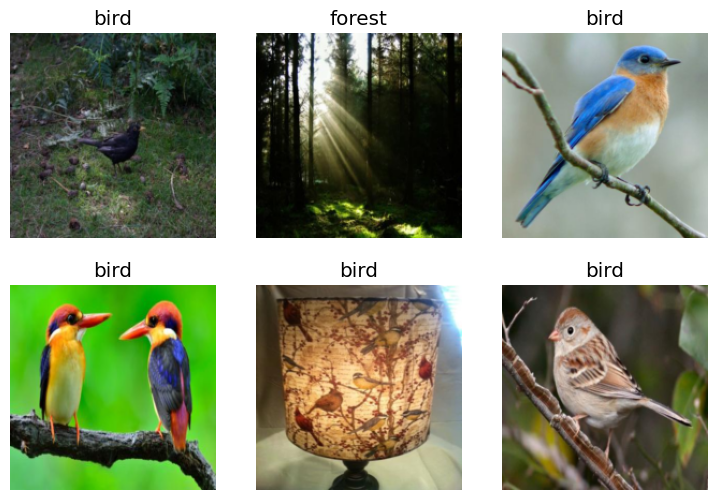

In [10]:
# 定義DataBlock參數
dls = DataBlock(

    # 我們模型的輸入是影像，輸出是類別（在本例中為“鳥”或“森林”）。
    blocks=(ImageBlock, CategoryBlock),
    
    # 尋找模型的所有輸入，執行 get_image_files 函數（回傳迴路徑中所有影像檔案的清單）
    get_items=get_image_files, 
    
    # 將資料隨機分為訓練集和驗證集，使用 20% 的資料作為驗證集
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    
    # 標籤（ y 值）是每個檔案的 parent 的名稱（所在的資料夾的名稱，可以是bird或forest）
    get_y=parent_label,
    
    # 在訓練之前，透過「壓縮」圖像（而不是裁剪圖像）將每個圖像的大小壓縮為 192x192 像素
    item_tfms=[Resize(192, method='squish')]

# 使用 ImageDataLoaders 來從指定路徑 path 加載圖片數據，定義函數搜索並返回圖片列表，圖片數量為32
).dataloaders(path, bs=32)

# 顯示資料集的前 6 張圖片
dls.show_batch(max_n=6)

In [11]:
# 創建一個視覺學習器（vision learner），用於訓練圖像分類模型
# (數據加載器 dataloader, 預訓練的模型 ResNet18, 錯誤率) 
learn = vision_learner(dls, resnet18, metrics=error_rate)

# Fastai 庫中用於微調模型的函數，(3)：指定微調的輪數（epochs）
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 168MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.889375,0.185912,0.096774,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.155797,0.006387,0.000000,00:15
1,0.088866,0.001103,0.000000,00:14
2,0.061054,0.000836,0.000000,00:15


In [12]:
# 使用訓練好的學習模型進行圖片預測，讀取名為「bird.jpg」的圖片
# 函數返回三個值(布林值, "_" 表示未使用, 機率)
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))

# 是否為鳥類圖片的預測結果
print(f"This is a: {is_bird}.")

# 輸出圖片為鳥類的機率，保留 4 位小數
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000
